In [1]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree as mst
from scipy.optimize import fmin
from copy import copy
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
def distance(coor1, coor2):
    return ((coor1[0] - coor2[0])**2 + (coor1[1] - coor2[1])**2)**0.5

def plt2coor(coor):
    return 73.4 + coor[0]*(13.16/600), 52.4 + (450-coor[1])*(5.63/450)

In [3]:
def coordinate_descent(f, x0, e=0.001):
    iter_list = [0]
    m_list = [-1]
    dist_list = [-1]
    f_list = [f(x0)]
    x_list = [x0]
    
    def f_1(x, *args):
        return f([x, args[0]])
    
    def f_2(y, *args):
        return f([args[0], y])
    
    x1 = copy(x0)
    iteration = 0
    while distance(x0, x1)>e or iteration == 0:
        x0 = copy(x1)
        x_new = fmin(f_1, x0[0], args=tuple([x0[1]]), disp=False)[0]
        y_new = fmin(f_2, x0[1], args=tuple([x0[0]]), disp=False)[0]
        m = 0
        if abs(x_new - x0[0]) > abs(y_new - x0[1]):
            x1[0] = x_new
        else:
            x1[1] = y_new
            m = 1
        iteration += 1
        iter_list.append(iteration)
        m_list.append(m)
        dist_list.append(distance(x0, x1))
        f_list.append(copy(f(x1)))
        x_list.append(copy(x1))
     
    data = {'Итерация': iter_list,
           'Изменяемая координата': m_list,
           'Размер шага': dist_list,
           'f(x)': f_list,
           'x': x_list}
    return x1, data

# 1. Поиск без учета пассажиропотока

In [4]:
with open("new_coordinates_of_district_center.json", "r") as read_file:
    new_data = json.load(read_file)

In [5]:
def f(x):
    s = 0
    for coor in new_data.values():
        s += distance(x, coor)
    return s 

<IPython.core.display.Javascript object>


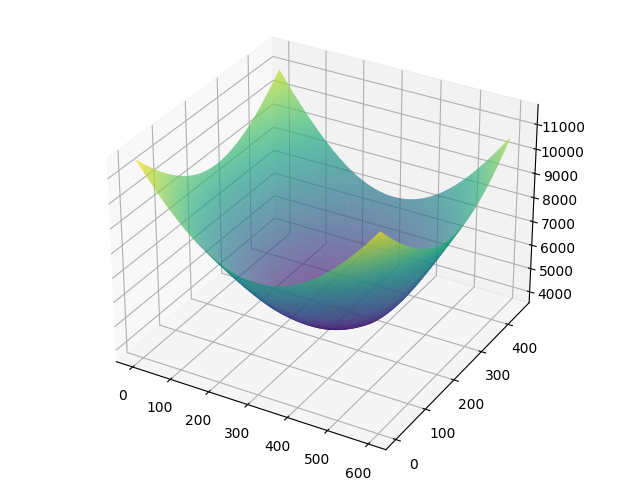

In [6]:
%matplotlib notebook
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(0, 600, 1)
Y = np.arange(0, 450, 1)
X,Y = np.meshgrid(X,Y)
ax.plot_surface(X,Y,f([X,Y]), rstride=1, cstride=1, cmap='viridis')
plt.show()

In [7]:
p, data = coordinate_descent(f, [400, 150])

In [8]:
plt2coor(p)

(80.0952913967677, 54.88455362929275)

In [9]:
df = pd.DataFrame(data)
x = []
y = []
z = []
x_list = data['x']
dist_list = data['f(x)']
for i in range(len(x_list)):
    x.append(x_list[i][0])
    y.append(x_list[i][1])
    z.append(dist_list[i])

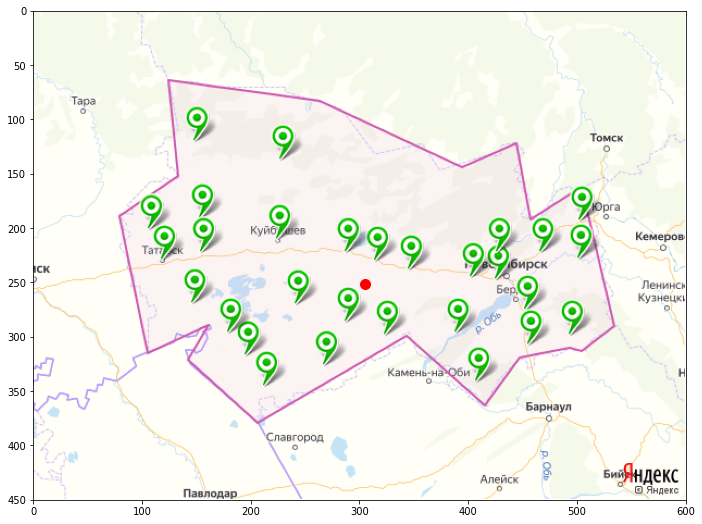

In [10]:
%matplotlib inline
plt.figure(figsize=(12, 9))
plt.axis([0, 600, 450, 0])
image = mpimg.imread("map.png")
plt.imshow(image)

plt.scatter(x[-1], y[-1], s=100, c='r')
plt.show()

<IPython.core.display.Javascript object>


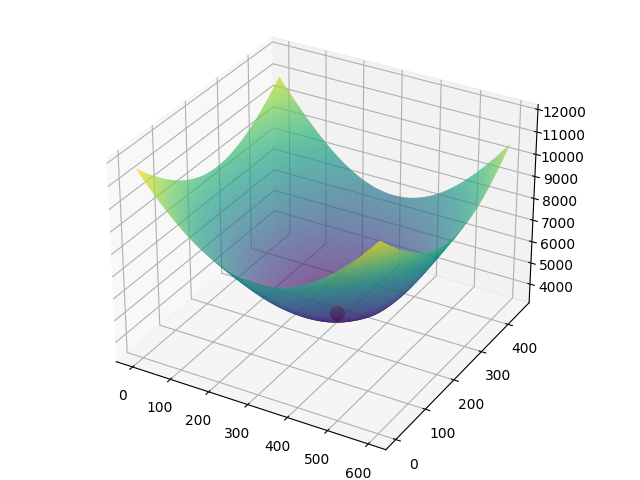

In [11]:
%matplotlib notebook
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(0, 600, 1)
Y = np.arange(0, 450, 1)
X,Y = np.meshgrid(X,Y)
ax.plot_surface(X,Y,f([X,Y]), rstride=1, cstride=1, cmap='viridis')
ax.scatter(x[-1], y[-1], z[-1], s=100, c='r')
plt.show()

In [12]:
df.head(-1)

Итерация  Изменяемая координата  Размер шага         f(x)  \
0         0                     -1    -1.000000  5282.491033   
1         1                      0   105.053482  4729.176323   
2         2                      1   102.086906  3696.743444   
3         3                      0    10.252706  3689.866059   
4         4                      1     0.671318  3689.824389   
5         5                      0     0.056931  3689.824177   
6         6                      1     0.003357  3689.824176   

                                          x  
0                                [400, 150]  
1                 [294.94651794433594, 150]  
2  [294.94651794433594, 252.08690643310547]  
3  [305.19922408081766, 252.08690643310547]  
4  [305.19922408081766, 251.41558887717838]  
5  [305.25615554618616, 251.41558887717838]  
6   [305.25615554618616, 251.4122321169204]

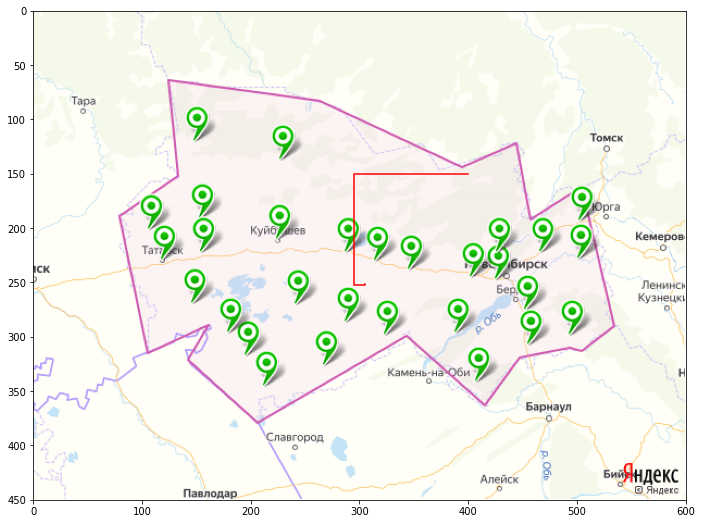

In [13]:
%matplotlib inline
plt.figure(figsize=(12, 9))
plt.axis([0, 600, 450, 0])
image = mpimg.imread("map.png")
plt.imshow(image)

plt.plot(x, y, 'r')
plt.show()

<IPython.core.display.Javascript object>


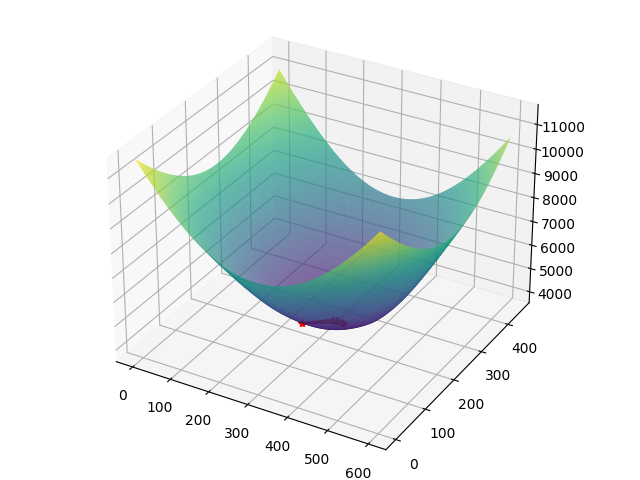

In [14]:
%matplotlib notebook
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(0, 600, 1)
Y = np.arange(0, 450, 1)
X,Y = np.meshgrid(X,Y)
ax.plot_surface(X,Y,f([X,Y]), rstride=1, cstride=1, cmap='viridis')
ax.plot(x, y, z, 'r-*')
plt.show()

# 2. Поиск с учетом пассажиропотока

In [15]:
with open("new_coordinates_of_district_center.json", "r") as read_file:
    new_data = json.load(read_file)

In [16]:
S = 0
for v in new_data.values():
    S += v[-1]

def f(x):
    s = 0
    for coor in new_data.values():
        s += distance(x, coor)*(coor[-1]/S)
    return s 

<IPython.core.display.Javascript object>


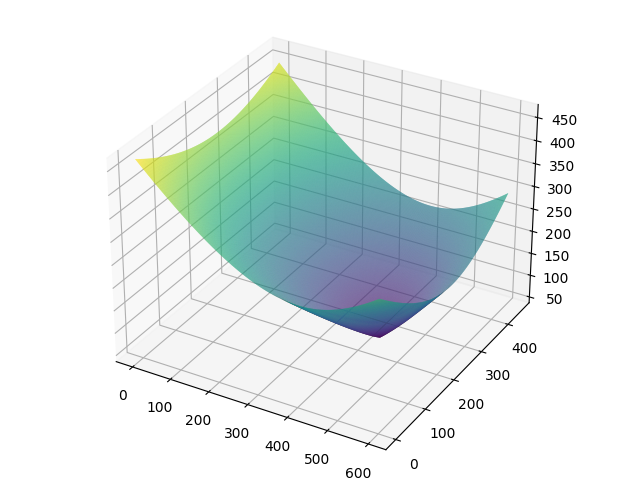

In [17]:
%matplotlib notebook
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(0, 600, 1)
Y = np.arange(0, 450, 1)
X,Y = np.meshgrid(X,Y)
ax.plot_surface(X,Y,f([X,Y]), rstride=1, cstride=1, cmap='viridis')
plt.show()

In [18]:
p, data = coordinate_descent(f, [100, 100])

In [19]:
plt2coor(p)

(82.71250038856705, 54.99166968593075)

In [20]:
df = pd.DataFrame(data)
x = []
y = []
z = []
x_list = data['x']
dist_list = data['f(x)']
for i in range(len(x_list)):
    x.append(x_list[i][0])
    y.append(x_list[i][1])
    z.append(dist_list[i])

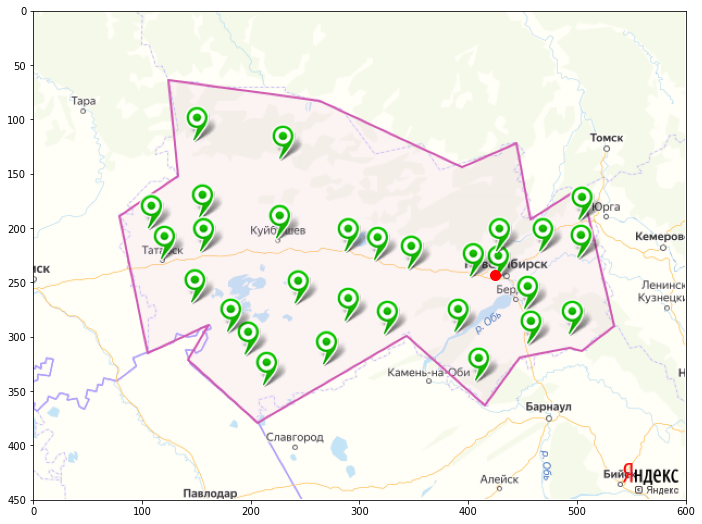

In [21]:
%matplotlib inline
plt.figure(figsize=(12, 9))
plt.axis([0, 600, 450, 0])
image = mpimg.imread("map.png")
plt.imshow(image)

plt.scatter(x[-1], y[-1], s=100, c='r')
plt.show()

<IPython.core.display.Javascript object>


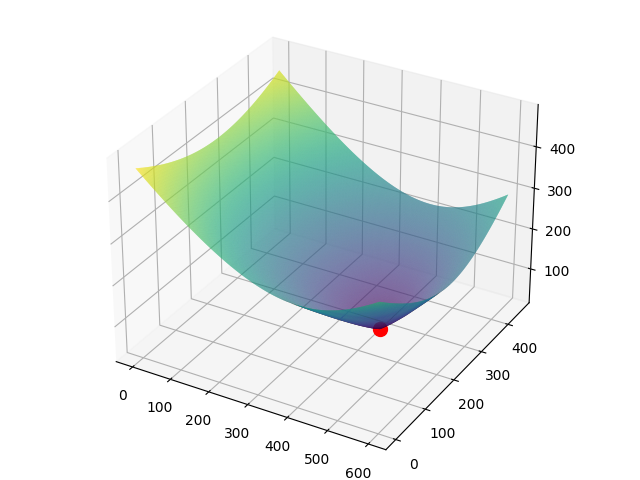

In [22]:
%matplotlib notebook
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(0, 600, 1)
Y = np.arange(0, 450, 1)
X,Y = np.meshgrid(X,Y)
ax.plot_surface(X,Y,f([X,Y]), rstride=1, cstride=1, cmap='viridis')
ax.scatter(x[-1], y[-1], z[-1], s=100, c='r')
plt.show()

In [23]:
df.head(-1)

Итерация  Изменяемая координата  Размер шага        f(x)  \
0         0                     -1    -1.000000  334.474633   
1         1                      0   307.971573  166.162456   
2         2                      1   143.699570   54.670683   
3         3                      0    16.475799   45.548239   
4         4                      1     0.840766   45.091304   
5         5                      0     0.133417   45.019748   
6         6                      1     0.008153   45.015288   
7         7                      0     0.001296   45.014637   

                                          x  
0                                [100, 100]  
1                 [407.97157287597656, 100]  
2  [407.97157287597656, 243.69956970214844]  
3  [424.44737187732244, 243.69956970214844]  
4  [424.44737187732244, 242.85880321182776]  
5  [424.58078886738394, 242.85880321182776]  
6  [424.58078886738394, 242.85065060307738]  
7   [424.5820845851234, 242.85065060307738]

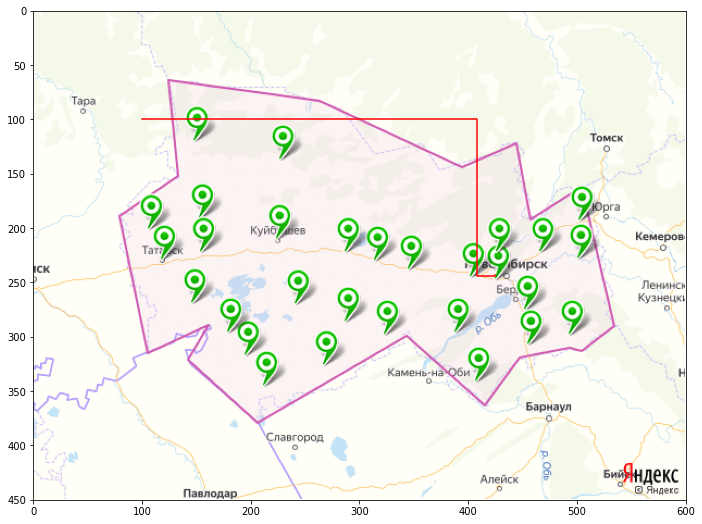

In [24]:
%matplotlib inline
plt.figure(figsize=(12, 9))
plt.axis([0, 600, 450, 0])
image = mpimg.imread("map.png")
plt.imshow(image)

plt.plot(x, y, 'r')
plt.show()

<IPython.core.display.Javascript object>


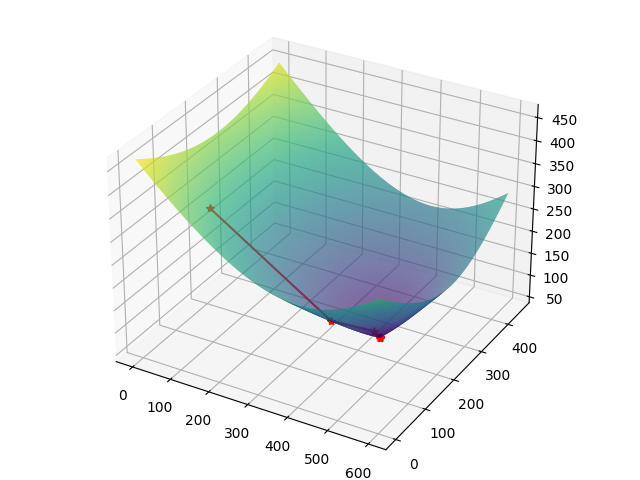

In [25]:
%matplotlib notebook
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(0, 600, 1)
Y = np.arange(0, 450, 1)
X,Y = np.meshgrid(X,Y)
ax.plot_surface(X,Y,f([X,Y]), rstride=1, cstride=1, cmap='viridis')
ax.plot(x, y, z, 'r-*')
plt.show()

# 3. Поиск без учета пассажиропотока г. Новосибирска

In [26]:
with open("new_coordinates_of_district_center.json", "r") as read_file:
    new_data = json.load(read_file)
    
c = new_data['Обь']
c[-1] = 0
new_data['Обь'] = c

In [27]:
S = 0
for v in new_data.values():
    S += v[-1]

def f(x):
    s = 0
    for coor in new_data.values():
        s += distance(x, coor)*(coor[-1]/S)
    return s 

<IPython.core.display.Javascript object>


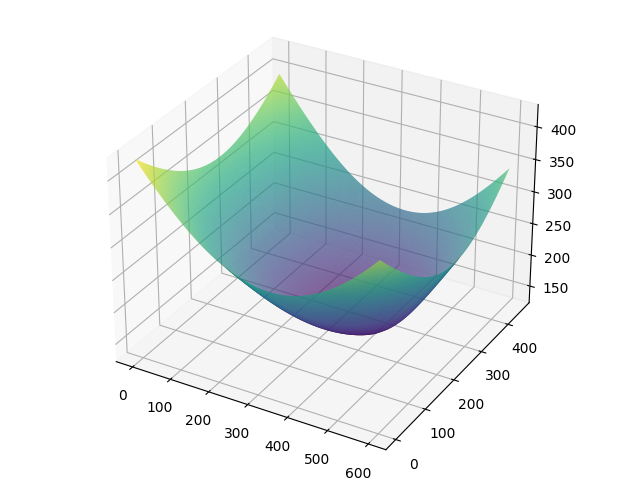

In [28]:
%matplotlib notebook
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(0, 600, 1)
Y = np.arange(0, 450, 1)
X,Y = np.meshgrid(X,Y)
ax.plot_surface(X,Y,f([X,Y]), rstride=1, cstride=1, cmap='viridis')
plt.show()

In [29]:
p, data = coordinate_descent(f, [100, 100])

In [30]:
plt2coor(p)

(81.20057892431248, 54.80067788839758)

In [31]:
df = pd.DataFrame(data)
x = []
y = []
z = []
x_list = data['x']
dist_list = data['f(x)']
for i in range(len(x_list)):
    x.append(x_list[i][0])
    y.append(x_list[i][1])
    z.append(dist_list[i])

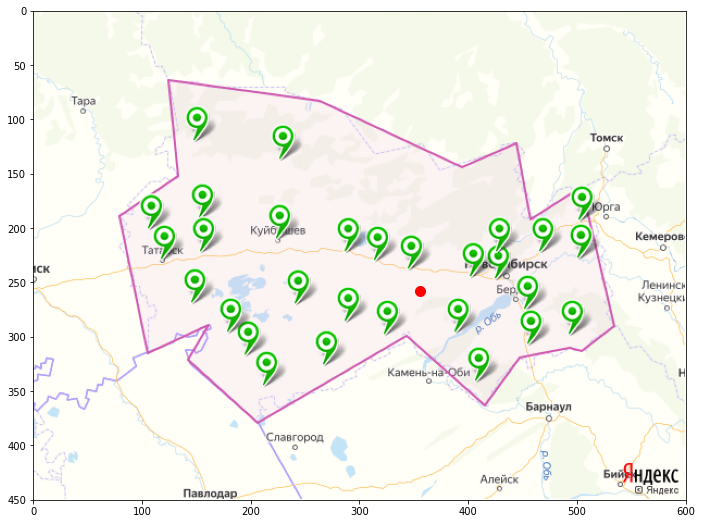

In [32]:
%matplotlib inline
plt.figure(figsize=(12, 9))
plt.axis([0, 600, 450, 0])
image = mpimg.imread("map.png")
plt.imshow(image)

plt.scatter(x[-1], y[-1], s=100, c='r')
plt.show()

<IPython.core.display.Javascript object>


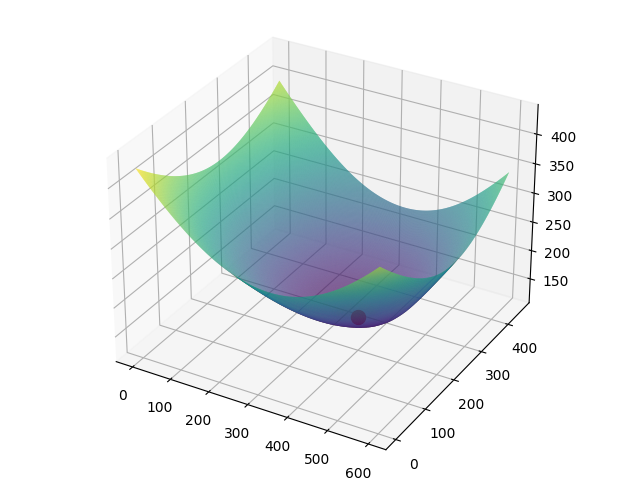

In [33]:
%matplotlib notebook
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(0, 600, 1)
Y = np.arange(0, 450, 1)
X,Y = np.meshgrid(X,Y)
ax.plot_surface(X,Y,f([X,Y]), rstride=1, cstride=1, cmap='viridis')
ax.scatter(x[-1], y[-1], z[-1], s=100, c='r')
plt.show()

In [34]:
df.head(-1)

Итерация  Изменяемая координата  Размер шага        f(x)  \
0         0                     -1    -1.000000  292.173793   
1         1                      0   235.084763  204.394465   
2         2                      1   157.475433  129.654684   
3         3                      0    20.451823  129.003557   
4         4                      1     0.633022  129.002095   
5         5                      0     0.111553  129.002077   
6         6                      1     0.007778  129.002077   
7         7                      0     0.001357  129.002077   

                                         x  
0                               [100, 100]  
1                 [335.0847625732422, 100]  
2   [335.0847625732422, 257.4754333496094]  
3   [355.5365855892014, 257.4754333496094]  
4   [355.5365855892014, 258.1084553405526]  
5  [355.64813833946346, 258.1084553405526]  
6  [355.64813833946346, 258.1162337249413]  
7   [355.6494950294443, 258.1162337249413]

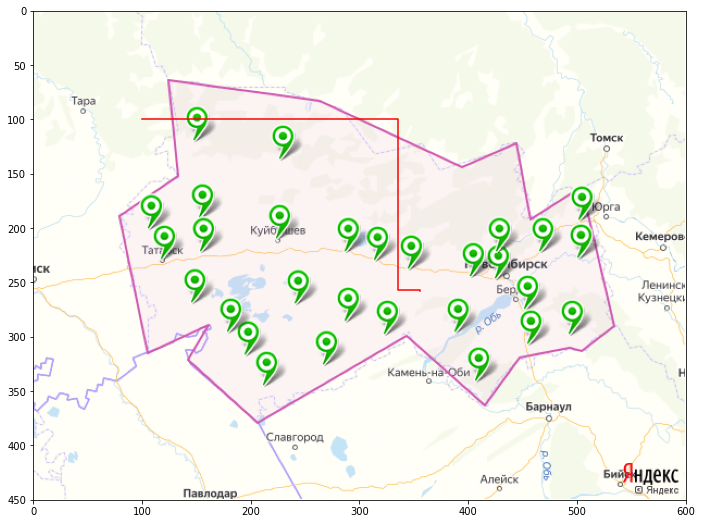

In [35]:
%matplotlib inline
plt.figure(figsize=(12, 9))
plt.axis([0, 600, 450, 0])
image = mpimg.imread("map.png")
plt.imshow(image)

plt.plot(x, y, 'r')
plt.show()

<IPython.core.display.Javascript object>


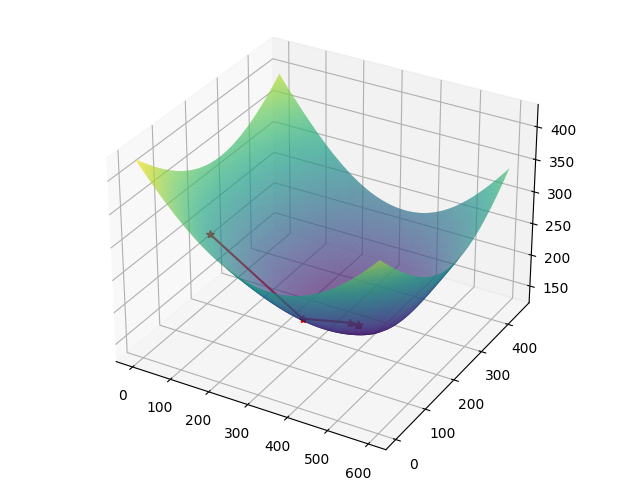

In [36]:
%matplotlib notebook
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(0, 600, 1)
Y = np.arange(0, 450, 1)
X,Y = np.meshgrid(X,Y)
ax.plot_surface(X,Y,f([X,Y]), rstride=1, cstride=1, cmap='viridis')
ax.plot(x, y, z, 'r-*')
plt.show()